## Computation on Arrays: Broadcasting

In this chapter we will discuss *broadcasting*: rules used by NumPy to apply binary operation between arrays with different sizes or shapes.

### Introducing Broadcasting

In arrays with same size or shape, binary operations are applied element by element:

In [3]:
import numpy as np

a = np.arange(1, 5)
b = np.arange(2, 6)

print(a)
print(b)
print(a + b)

[1 2 3 4]
[2 3 4 5]
[3 5 7 9]


Broadcasting allows apply a binary operation between arrays with different sizes or shapes - for example, add a scalar to an array:

In [4]:
print(a)
print(a + 4)

[1 2 3 4]
[5 6 7 8]


Numpy just duplicate the value 4 for each value of `a` and perform the sum, element by element. This idea can be extended for arrays with higher dimension:

In [7]:
m = np.arange(12).reshape((3, 4))

print(f"a = {a}\n")
print(f"m = \n{m}\n")
print(f"m + a = \n{m + a}")

a = [1 2 3 4]

m = 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

m + a = 
[[ 1  3  5  7]
 [ 5  7  9 11]
 [ 9 11 13 15]]


Note that the sum by `a` is applied for each element (line) of `m`. In other words:

$$ m + a = [m[0] + a, m[1] + a, \ldots, m[n] + a] $$

Thus, the array is broadcasted across the second dimension for match with shape of `m`. A more complex example is the following:

In [9]:
a = np.arange(3)
b = np.arange(3).reshape((3, 1))

print(f"a = \n{a}\n")
print(f"b = \n{b}\n")
print(f"a + b = \n{a + b}\n")

a = 
[0 1 2]

b = 
[[0]
 [1]
 [2]]

a + b = 
[[0 1 2]
 [1 2 3]
 [2 3 4]]



In this case, both `a` and `b` are broadcasted, to both have the same shape.

### Rules of Broadcasting

Broadcasting in NumPy follows the rules:

***Rule 1***
- If the two arrays differ in their number of dimensions, the shape of the one with
fewer dimensions is padded with ones on its leading (left) side.

***Rule 2***
- If the shape of the two arrays does not match in any dimension, the array with
shape equal to 1 in that dimension is stretched to match the other shape.

***Rule 3***
- If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

#### Example 1

Imagine you have the following arrays:

In [11]:
a = np.ones((3, 4), dtype = np.int32)
b = np.arange(1, 5, dtype = np.int32)

a, b

(array([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=int32),
 array([1, 2, 3, 4], dtype=int32))

For sum these two array we can apply the first rule, because the shape differ between the arrays:

1. `a` shape remains `(3, 4)`
2. `b` shape becomes `(1, 4)`

And now, for the second rule we have:

3. `a` shape remains `(3, 4)`
4. `b` shape becomes `(3, 4)`

Now the array `b` is an array composed by 3 arrays of size 4, each being a copy of the array `b` before all broadcasting operations.

In [12]:
a + b

array([[2, 3, 4, 5],
       [2, 3, 4, 5],
       [2, 3, 4, 5]], dtype=int32)

#### Example 2

Now, let's take a look at this example:

In [13]:
a = np.array([4, 2, 3, 1]).reshape((4, 1))
b = np.arange(1, 5)

a, b

(array([[4],
        [2],
        [3],
        [1]]),
 array([1, 2, 3, 4]))

For the rule 1, the array `b` must be broadcasted:

- `a` shape remains `(4, 1)`
- `b` shape becomes `(1, 4)`

Now, for the rule 2: both array must be broadcasted:

- `a` shape remains `(4, 4)`
- `b` shape becomes `(4, 4)`

In [14]:
a + b

array([[5, 6, 7, 8],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [2, 3, 4, 5]])

#### Example 3

The following example:

In [15]:
a = np.ones((4, 2))
b = np.arange(4)

a, b

(array([[1., 1.],
        [1., 1.],
        [1., 1.]]),
 array([0, 1, 2]))

For the first rule, `a` must be broadcasted:

- `a` shape remains `(4, 2)`
- `b` shape becomes `(1, 4)`

And for the second rule, we should get a big black cock like this:

- `a` shape remains `(4, 2)`
- `b` shape becomes `(4, 4)`

And for the third rule, the matrices are incompatible.

### Broadcasting in Practice

We will explore some examples of broadcasting.

#### Centering an Array

For centering the values of an array with the mean, we can do this:

In [26]:
x = np.random.random((7, 3))
xc = x - x.mean(0)

xc.mean(0)

array([ 4.75809868e-17, -3.17206578e-17, -2.37904934e-17])

#### Plotting a Two-Dimensional Function

For plotting an two-dimensional function, we can do this:

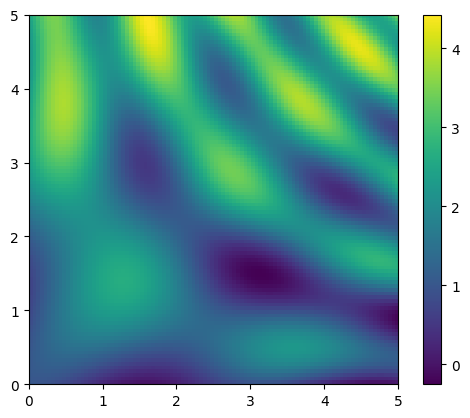

In [15]:
import matplotlib.pyplot as plt

n = 100

x = np.linspace(0, 5, n)
y = np.linspace(0, 5, n).reshape((n, 1))

z = np.sin(x * y) + np.cos(y - x) ** 2 + y / 2

plt.imshow(z, origin = "lower", extent = (0, 5, 0, 5))
plt.colorbar()

plt.show()